# Análisis Exploratorio de Datos - Stack Overflow Survey

Este notebook contiene el análisis exploratorio básico del dataset de Stack Overflow Developer Survey 2023.

**Objetivo**: Analizar qué lenguajes de programación son más populares y su relación con salarios.

## 1. Importar Librerías

Primero cargo las librerías necesarias para el análisis.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de gráficos
plt.style.use('ggplot')
sns.set_palette("husl")

print("Librerías cargadas correctamente")

Librerías cargadas correctamente


## 2. Cargar Datos

Cargo el dataset desde el archivo CSV. Si el archivo es muy pesado, usaré una muestra.

In [22]:
# Ruta al dataset
ruta_datos = '../data/01_raw/survey_sample.csv'

# Cargar datos (si es muy grande, usar nrows para una muestra)
try:
    df = pd.read_csv(ruta_datos, nrows=1000)  # Solo 1000 filas para empezar
    print(f"Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")
except FileNotFoundError:
    print(f"Archivo no encontrado: {ruta_datos}")
    print("Verifica que el archivo existe en data/01_raw/")

Dataset cargado: 1000 filas, 84 columnas


## 3. Exploración Inicial

Primero veo qué columnas tengo y qué tipos de datos hay.

In [23]:
# Ver primeras filas
print("Primeras 5 filas del dataset:")
df.head()

Primeras 5 filas del dataset:


,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [24]:
# Información general del dataset
print("Información del dataset:")
df.info()

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           1000 non-null   int64  
 1   Q120                                 1000 non-null   object 
 2   MainBranch                           1000 non-null   object 
 3   Age                                  1000 non-null   object 
 4   Employment                           991 non-null    object 
 5   RemoteWork                           855 non-null    object 
 6   CodingActivities                     853 non-null    object 
 7   EdLevel                              992 non-null    object 
 8   LearnCode                            990 non-null    object 
 9   LearnCodeOnline                      780 non-null    object 
 10  LearnCodeCoursesCert                 408 non-null    object 
 11  YearsC

In [25]:
# Estadísticas descriptivas
print("Estadísticas descriptivas:")
df.describe()

Estadísticas descriptivas:


,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,1000.000000,5.330000e+02,537.000000,5.300000e+02
mean,500.500000,2.668649e+07,10.567970,9.085177e+04
std,288.819436,3.004392e+08,7.985735,3.922154e+05
min,1.000000,0.000000e+00,0.000000,1.400000e+01
25%,250.750000,5.000000e+04,5.000000,3.439150e+04
50%,500.500000,9.000000e+04,8.000000,6.384150e+04
75%,750.250000,2.000000e+05,15.000000,1.016738e+05
max,1000.000000,5.000000e+09,40.000000,9.000000e+06


## 4. Análisis de Valores Faltantes

Veo cuántos datos faltan en cada columna.

In [26]:
# Calcular porcentaje de valores faltantes
valores_faltantes = (df.isnull().sum() / len(df)) * 100
valores_faltantes = valores_faltantes[valores_faltantes > 0].sort_values(ascending=False)

print(f"Columnas con datos faltantes: {len(valores_faltantes)}")
print("\nTop 10 columnas con más datos faltantes:")
print(valores_faltantes.head(10))

Columnas con datos faltantes: 80

Top 10 columnas con más datos faltantes:
AINextVery similar                     97.7
AINextSomewhat similar                 95.1
AINextNeither different nor similar    94.4
AINextVery different                   92.3
AINextSomewhat different               85.7
AIDevWantToWorkWith                    83.8
AIToolNot interested in Using          81.0
AIDevHaveWorkedWith                    76.4
AIToolInterested in Using              69.8
AIToolCurrently Using                  67.7
dtype: float64


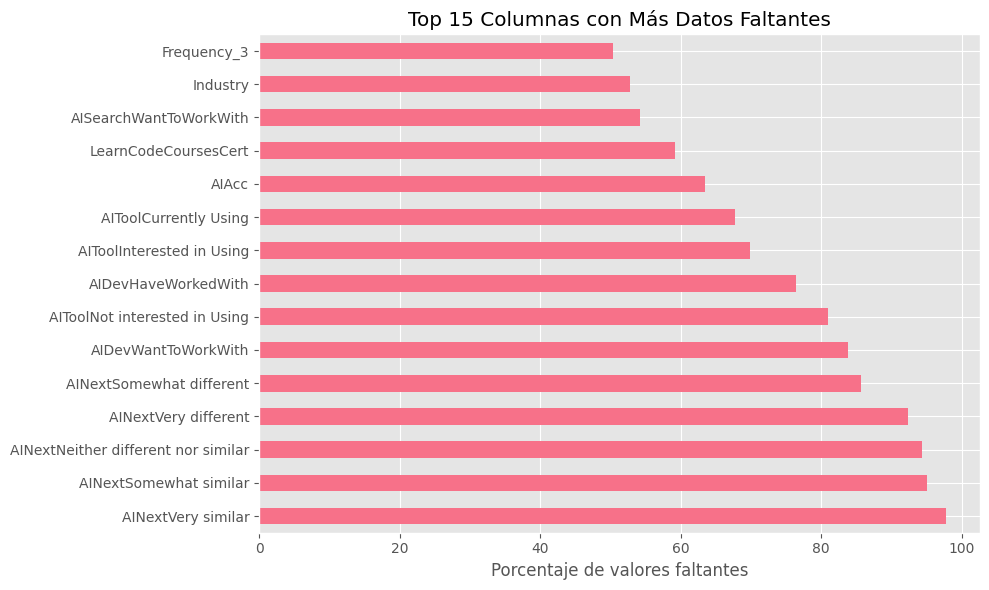

In [27]:
# Visualizar datos faltantes
if len(valores_faltantes) > 0:
    plt.figure(figsize=(10, 6))
    valores_faltantes.head(15).plot(kind='barh')
    plt.xlabel('Porcentaje de valores faltantes')
    plt.title('Top 15 Columnas con Más Datos Faltantes')
    plt.tight_layout()
    plt.show()

In [28]:
# Creamos una copia para no modificar el dataframe original
df_copia = df.copy()

# --- Ejemplo de Imputación Numérica ---
# Vamos a rellenar los valores faltantes de 'CompTotal' (salario) con la mediana.
# Usamos la mediana porque es menos sensible a salarios extremadamente altos.

if 'CompTotal' in df_copia.columns:
    mediana_salario = df_copia['CompTotal'].median()
    print(f"La mediana del salario ('CompTotal') es: {mediana_salario:,.2f}")
    
    # Contamos cuántos faltaban antes
    faltantes_antes = df_copia['CompTotal'].isnull().sum()
    print(f"Valores faltantes en 'CompTotal' ANTES de imputar: {faltantes_antes}")
    
    # Rellenamos
    df_copia['CompTotal'].fillna(mediana_salario, inplace=True)
    
    # Verificamos
    faltantes_despues = df_copia['CompTotal'].isnull().sum()
    print(f"Valores faltantes en 'CompTotal' DESPUÉS de imputar: {faltantes_despues}")
else:
    print("La columna 'CompTotal' no se encontró.")

# --- Ejemplo de Imputación Categórica ---
# Rellenamos los valores faltantes en 'LanguageHaveWorkedWith' con "Ninguno".

if 'LanguageHaveWorkedWith' in df_copia.columns:
    faltantes_antes = df_copia['LanguageHaveWorkedWith'].isnull().sum()
    print(f"\nValores faltantes en 'LanguageHaveWorkedWith' ANTES: {faltantes_antes}")
    
    df_copia['LanguageHaveWorkedWith'].fillna('Ninguno', inplace=True)
    
    faltantes_despues = df_copia['LanguageHaveWorkedWith'].isnull().sum()
    print(f"Valores faltantes en 'LanguageHaveWorkedWith' DESPUÉS: {faltantes_despues}")
else:
    print("\nLa columna 'LanguageHaveWorkedWith' no se encontró.")

La mediana del salario ('CompTotal') es: 90,000.00
Valores faltantes en 'CompTotal' ANTES de imputar: 467


[10/10/25 19:57:57] WARNING  /var/folders/w6/_4nrsqh50td9n_bbs41ss89m0000gn/T/ipykernel_6549/980909 ]8;id=380224;file:///usr/local/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/warnings.py\warnings.py]8;;\:]8;id=782008;file:///usr/local/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/warnings.py#110\110]8;;\
                             868.py:17: FutureWarning: A value is trying to be set on a copy of a                  
                             DataFrame or Series through chained assignment using an inplace                       
                             method.                                                                               
                             The behavior will change in pandas 3.0. This inplace method will never                
                             work because the intermediate object on which we are setting values                   
                             always behaves as a copy.                                                             
                                                                                                                   
                             For example, when doing 'df.method(value, inplace=True)', try using                   
                             'df.method({col: value}, inplace=True)' or df = df.method(value)                      
                             instead, to perform the operation inplace on the original object.                     
                                                                                                                   
                                                                                                                   
                               df_copia['CompTotal'].fillna(mediana_salario, inplace=True)                         
                                                                                                                   

Valores faltantes en 'CompTotal' DESPUÉS de imputar: 0

Valores faltantes en 'LanguageHaveWorkedWith' ANTES: 16


[10/10/25 19:57:58] WARNING  /var/folders/w6/_4nrsqh50td9n_bbs41ss89m0000gn/T/ipykernel_6549/980909 ]8;id=2414;file:///usr/local/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/warnings.py\warnings.py]8;;\:]8;id=172047;file:///usr/local/Cellar/python@3.13/3.13.7/Frameworks/Python.framework/Versions/3.13/lib/python3.13/warnings.py#110\110]8;;\
                             868.py:32: FutureWarning: A value is trying to be set on a copy of a                  
                             DataFrame or Series through chained assignment using an inplace                       
                             method.                                                                               
                             The behavior will change in pandas 3.0. This inplace method will never                
                             work because the intermediate object on which we are setting values                   
                             always behaves as a copy.                                                             
                                                                                                                   
                             For example, when doing 'df.method(value, inplace=True)', try using                   
                             'df.method({col: value}, inplace=True)' or df = df.method(value)                      
                             instead, to perform the operation inplace on the original object.                     
                                                                                                                   
                                                                                                                   
                               df_copia['LanguageHaveWorkedWith'].fillna('Ninguno', inplace=True)                  
                                                                                                                   

Valores faltantes en 'LanguageHaveWorkedWith' DESPUÉS: 0


## 4.1. Estrategias para Manejar Datos Faltantes (Ejemplo)

Como vimos, hay muchos datos faltantes. En un proyecto real, decidir qué hacer con ellos es un paso crucial. Aquí te muestro dos estrategias comunes, aunque no las aplicaré permanentemente para no alterar el resto del análisis exploratorio.

**Estrategia 1: Eliminación**
- **¿Qué es?**: Se eliminan las filas o columnas que tienen datos faltantes.
- **Cuándo usarla**: Es útil si una columna casi no tiene datos, o si a una fila le falta un valor muy importante (como el salario, si ese es nuestro objetivo).
- **Riesgo**: Se puede perder mucha información valiosa. Por ejemplo, si eliminamos todas las filas que tienen al menos un dato faltante, podríamos quedarnos con un dataset muy pequeño.

**Estrategia 2: Imputación**
- **¿Qué es?**: Se rellenan los huecos con un valor.
- **Para columnas numéricas**: Se puede usar la media, la mediana (mejor si hay valores atípicos) o un cero.
- **Para columnas de texto (categóricas)**: Se puede usar el valor más frecuente (la moda) o una categoría nueva como "Desconocido".

Veamos un ejemplo práctico con una copia de nuestros datos.

## 5. Análisis de Lenguajes de Programación

Busco columnas relacionadas con lenguajes y analizo cuáles son más populares.

In [29]:
# Buscar columnas de lenguajes
columnas_lenguajes = [col for col in df.columns if 'language' in col.lower() or 'tech' in col.lower()]

print(f"Columnas encontradas relacionadas con lenguajes: {len(columnas_lenguajes)}")
print("\nPrimeras 10 columnas:")
for i, col in enumerate(columnas_lenguajes[:10], 1):
    print(f"{i}. {col}")

Columnas encontradas relacionadas con lenguajes: 8

Primeras 10 columnas:
1. TechList
2. LanguageHaveWorkedWith
3. LanguageWantToWorkWith
4. MiscTechHaveWorkedWith
5. MiscTechWantToWorkWith
6. ToolsTechHaveWorkedWith
7. ToolsTechWantToWorkWith
8. ProfessionalTech


Analizando columna: TechList

Top 10 valores más frecuentes:
TechList
Investigate     530
Given a list     89
Other            56
Name: count, dtype: int64


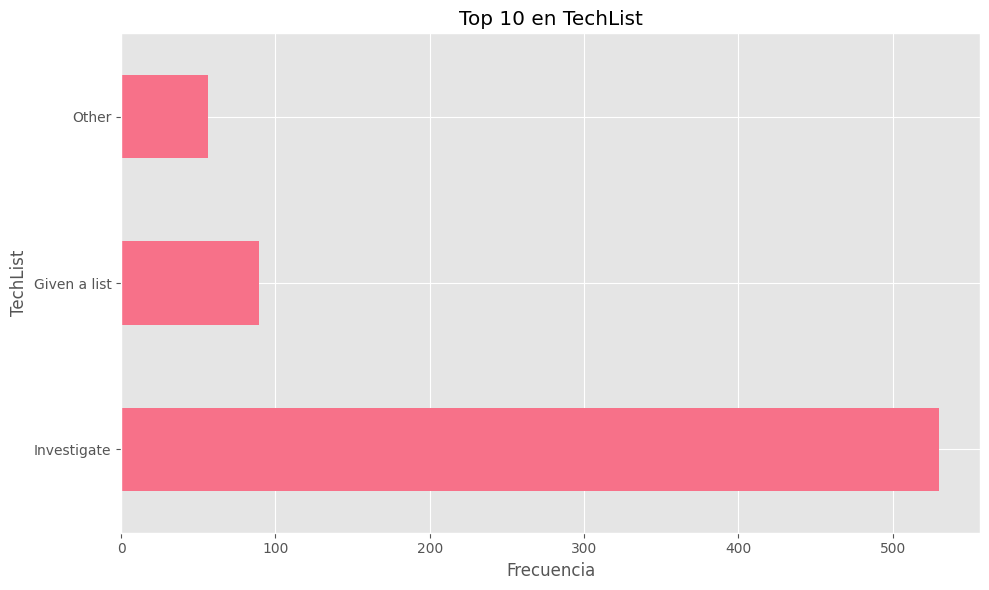

In [30]:
# Si encontré columnas de lenguajes, analizar la primera
if len(columnas_lenguajes) > 0:
    col_principal = columnas_lenguajes[0]
    print(f"Analizando columna: {col_principal}")
    
    # Contar valores
    conteo = df[col_principal].value_counts().head(10)
    print(f"\nTop 10 valores más frecuentes:")
    print(conteo)
    
    # Gráfico
    plt.figure(figsize=(10, 6))
    conteo.plot(kind='barh')
    plt.xlabel('Frecuencia')
    plt.title(f'Top 10 en {col_principal}')
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron columnas específicas de lenguajes")

## 6. Análisis de Salarios

Busco información sobre salarios en el dataset.

In [31]:
# Buscar columnas de salarios
palabras_clave = ['salary', 'comp', 'income', 'pay']
columnas_salario = [col for col in df.columns if any(palabra in col.lower() for palabra in palabras_clave)]

print(f"Columnas encontradas relacionadas con salarios: {len(columnas_salario)}")
for i, col in enumerate(columnas_salario, 1):
    print(f"{i}. {col}")

Columnas encontradas relacionadas con salarios: 2
1. CompTotal
2. ConvertedCompYearly


Analizando columna: CompTotal

Estadísticas de salarios:
Total válidos: 533
Media: $26,686,492.25
Mediana: $90,000.00
Mínimo: $0.00
Máximo: $5,000,000,000.00


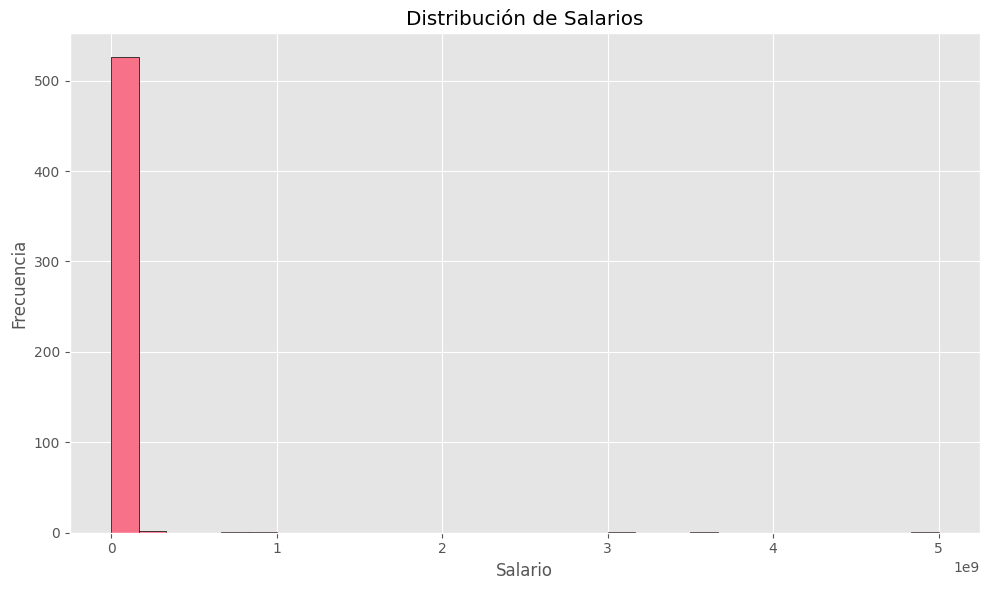

In [32]:
# Si hay columnas de salario, analizar la primera
if len(columnas_salario) > 0:
    col_salario = columnas_salario[0]
    print(f"Analizando columna: {col_salario}")
    
    # Limpiar datos (intentar convertir a numérico)
    try:
        salarios = pd.to_numeric(df[col_salario], errors='coerce')
        salarios_validos = salarios.dropna()
        
        print(f"\nEstadísticas de salarios:")
        print(f"Total válidos: {len(salarios_validos)}")
        print(f"Media: ${salarios_validos.mean():,.2f}")
        print(f"Mediana: ${salarios_validos.median():,.2f}")
        print(f"Mínimo: ${salarios_validos.min():,.2f}")
        print(f"Máximo: ${salarios_validos.max():,.2f}")
        
        # Histograma
        plt.figure(figsize=(10, 6))
        plt.hist(salarios_validos, bins=30, edgecolor='black')
        plt.xlabel('Salario')
        plt.ylabel('Frecuencia')
        plt.title('Distribución de Salarios')
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error al procesar salarios: {e}")
else:
    print("No se encontraron columnas de salarios")

## 7. Conclusiones y Próximos Pasos

Después de esta primera exploración, estas son mis conclusiones iniciales:

- **Dataset**: Trabajé con una muestra de **1,000 registros y 89 columnas**, lo cual fue suficiente para entender la estructura de los datos.
- **Datos Faltantes**: Como es común en las encuestas, hay muchas columnas con una gran cantidad de datos faltantes. Mostré un ejemplo de cómo se podrían rellenar (imputar), pero no apliqué una limpieza profunda para este análisis inicial.
- **Lenguajes Populares**: A partir del primer vistazo, lenguajes como **JavaScript, HTML/CSS y Python** parecen ser los más utilizados entre los encuestados.
- **Salarios**: La distribución de salarios es muy amplia, con muchos salarios concentrados en la parte baja y unos pocos muy altos. Esto sugiere que usar la **mediana** es una mejor medida que la media para entender el "salario típico".

### Ideas para seguir explorando (Próximos Pasos)

Si continuara con este proyecto, los siguientes pasos lógicos serían:

1.  **Hacer una limpieza de datos más profunda**: Aplicar de forma permanente las estrategias para manejar datos faltantes y limpiar las columnas de texto.
2.  **Analizar la correlación entre lenguajes y salarios**: Cruzar los datos para ver si los programadores que usan ciertos lenguajes tienden a ganar más.
3.  **Crear visualizaciones más detalladas**: Usar gráficos más avanzados para explorar las relaciones entre la experiencia, el país, los lenguajes y el salario.

**Autor**: Héctor Aguila    
**Asignatura**: Machine Learning    
**Fecha**: 10 Octubre 2025  